# <font color='Chartreuse'>**Dye Modeling Notebook: Predicting Properties and Generating Structures**</font>

<font color='#66fdbd '>ENCH-670_SP25: <br>
Fluorescence and Absorbance Computational Science <br> Group 4: **F**aezeh **A**mir **C**odi **S**ahar 
</font>

# <font color='orange'>Table of Contents</font>
***
>1. Project Overview — Intro: tetrapyrrolic dyes, optical and photophysical properties, modeling goals
2. Glossary of Terms — Definitions like Egap, Stokes Shift, HOMO, LUMO, SMARTS, etc.
3. Environment Setup — Package installs, imports with doc comments.
4. SMILES Validation and InChI Key Uniqueness — Ensuring chemical consistency.
5. File Handling and Data Cleaning — CSV merging, header cleaning, initial sanity check.
6. Evaluation and Tests - Continual Sanity Checks
7. Feature Engineering — Optical, structural, SMARTS-based, and Mordred descriptors.
8. Modeling — Linear Regression and Random forest regression with explainable metrics.
9. User model testing — Add a new molecule, check against training data, visualize comparisons.
10. Fragment Feature Similarity Modeling — Show statistical, chemical, and property-based similarity.
11. Ligand Perturbation System — SMARTS-based replacement, visual diffs, impact on spectra.


<font color='red'>1. Project Overview </font>
***
The fundamental chromophore class of tetrapyrrolic macrocyclic dyes contain very distinct optical and photophysical properties. **Quantitative Structure-Property Relationships (QSPR) theory** is primarily based upon the assumption that the physicochemical properties of a compound are directly related to its molecular structure.

The photosynthetic center of a plant's chlorophyll exploits the optical and photophysical properties for solar energy conversion. These molecular arrays are particullary interesting for biomedical imaging, photodynamic therapy, solar cells, and OLEDs.

*We herein attempt to improve the efficiency of dye discovery through reduction of resource and time intesive associated costs with a machine learned model.* <br>
The goal of the model is to evaluate QSPR to determine optical and photophysical properties. A required user-defined porphrynoid chemical identifier such as a `SMILE` string and optional user-defined desirable properties shall be inputs. The output shall predict properties such as \($\lambda_{em}$) and then shall generate a related structure whose properties are closer to the user's desirable properties. 

<font color='red'>2. Glossary of Terms </font>
***
IUPAC : List of Terms : https://www.degruyter.com/document/doi/10.1351/pac200779030293/pdf

Chem LibreTexts : Fundmental concepts : https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Spectroscopy/Electronic_Spectroscopy/Fluorescence_and_Phosphorescence

<font color='red'>3. Environment Setup </font>
***

In [111]:
##Installer with suggestions
# numpy pandas rdkit mordred seaborn openbabel py3dmol tqdm selfies pyl3dmd

##Setup and Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    Draw, 
    rdCoordGen, 
    Lipinski, 
    Crippen, 
    Descriptors, 
    Fingerprints, 
    Scaffolds, 
    MolStandardize, 
    rdSynthonSpaceSearch, 
    AllChem, 
    rdFingerprintGenerator
)
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from IPython.display import SVG
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

IPythonConsole.molSize = 250,200 #Sets output size for drawings

#:CH - Codi Edits
#For dataset saved in same subdriectory use the following 
filename = "new_dataset_merged_max.csv" #change this
emission_column = 'emission' #Change this as needed
emission_units = 'nm' 
DataSet = pd.read_csv(filename)

# Initialize Morgan fingerprint generator
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048, includeChirality=False)

<font color='red'>4. SMILES Validation and SELFIES Uniqueness with InChI Key for broad access </font>
***

In [ ]:
##SMILES Uniqueness & Verification

def ValidateAndStandardize():
    """
    Processes a DataBase by validating the SMILES column to ensure uniqueness.
    Converts to Canonical SMILES and/or InChI for consistency.
    Convert to SELFIES
    """

def VisualizeDatabaseSmiles():
    """
    Draws images for visual inspection via human for each unique set in DataBase {SMILES and SELFIES and Canonical SMILES and InChI}     
    """


In [107]:
#:CH
# SMILES to SMARTS
Smarts_mol = Chem.MolFromSmiles(DataSet.iloc[1, 0])
Chem.MolToSmarts(Smarts_mol)

'[#6]-[#6]1(-[#6])-[#6]-[#6]2:[#6]:[#6]3:[#6]:[#6]:[#6](:[#7H]:3):[#6]:[#6]3-[#6]=[#6]-[#6](:[#6]:[#6]4:[#6]:[#6]:[#6](:[#6]:[#6]-1:[#7]:2):[#7H]:4):[#7]:3'

In [2]:
#:CH
#convert to InChI
#works just needs better area for implenetation.
#rdkit.Chem.inchi.MolToInchi(DataSet.iloc[RowNumber, 0])

#visualizing the molecules in the dataset
def VisualizeMolecule2D(RowNumber):
    """
    Generates a 2D SVG image of the molecule from the SMILES in the given DataSet row.
    """
    smiles = DataSet.iloc[RowNumber, 0]
    molecule = Chem.MolFromSmiles(smiles)    
    d2d = rdMolDraw2D.MolDraw2DSVG(300, 250)
    rdMolDraw2D.PrepareAndDrawMolecule(d2d, molecule)
    d2d.FinishDrawing()
    return SVG(d2d.GetDrawingText())

def VisualizeMoleculeCoordGen(RowNumber):
    """
    Adds 2D coordinates to a molecule and returns the RDKit Mol object.
    """
    smiles = DataSet.iloc[RowNumber, 0]
    molecule = Chem.MolFromSmiles(smiles)
    rdCoordGen.AddCoords(molecule)
    return molecule
    
# combines the output styles
def VisualizeMolecule(RowNumber):
    """
    Returns both the 2D SVG image and the molecule with generated coordinates.
    """
    smiles = DataSet.iloc[RowNumber, 0]
    print('Row number',RowNumber,'Contains the SMILES string: \n', smiles)
    return display(VisualizeMolecule2D(RowNumber)), display(VisualizeMoleculeCoordGen(RowNumber))


Row number 20 Contains the SMILES string: 
 CC(C)(CC1C=C(NC2=CC34)C=C2)C(N=1)=C(C(C=CC1)=CC=1)C(NC1C=C(N=3)C=C4)=CC=1


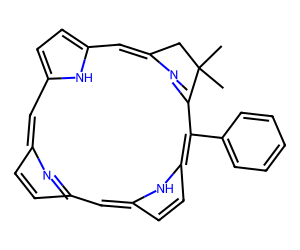

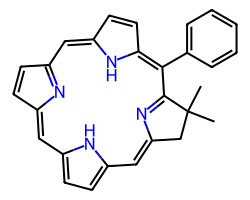

Row number 21 Contains the SMILES string: 
 CC(C=CC1C(C(=CC2)N(C=2C2)[Zn]3(N(C4C5)C(=C6)C=5)N(=C6C5)C=2C5(C)C)=C(C=C2)N3=C2C=4C(C(C)=CC2C)=C(C=2)C)=CC=1


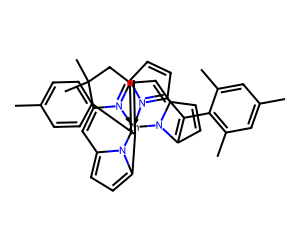

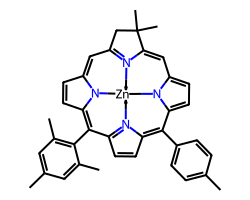

Row number 22 Contains the SMILES string: 
 CC(C=CC1C(=C(C=C2)N=C2C(C(=C(C)C=C2C)C(C)=C2)=C(C=C2)NC2=C2)C(=CC3)NC=3C=C(N=C22)C(C2)(C)C)=CC=1


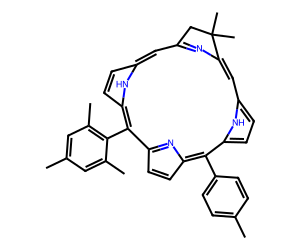

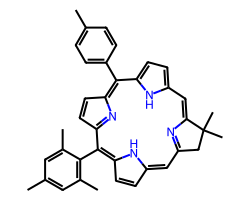

In [3]:
#:CH
#This allows for manual inspection of SMILES
low=20
high=low+3
for i in range(low,high):
    VisualizeMolecule(i)

<font color='red'>5. File Handling and Data Cleaning </font>
***
Be sure to name each Raw-Database with easy for human to read names.
<br><font color='Yellow'> **Important: DB structure and design should be intensly considered to handle multiple values for same property per chemical** </font>
<br> MOs = Molecular orbitals => should be broken into HOMO-LUMO pairs. Likely (Homo+1,Lumo-1)or(Homo+2,Homo+1,Lumo-1,Lumo-2)

In [ ]:
#Data Cleanup and Merging
def CleanAndMergeDatabases(FolderPath):
    """
    Reads all raw-databases (CSV files) from a folder and merges them into one master DataBase for each unique chemical.
    Normalizes column headers, format, and units. 
    Adds a value to identify the source (raw-database) for each property to allow for overlapping properties from different DataBases. 
    
    New DataBase is organized based on each unique name ID (like SELFIES). 
    """


##Evaluate Master DataBase

    
#Histogram visualization of the spread of data and to detect null fields.
#See next section for setup of visualizing general stuff.

<font color='red'>6. Evaluation and Tests </font>
***
Conituously will add to this ever growing section.
<br> **Focus on visualizing for data analysis prior to adding try/error and catch/throw handles**


In [ ]:
#Data Visualization
def SanityChecks():
    """
    Visualize spread of data in database for sanity checks
    
    Histograms
    Violin plots
    Clustering of scatterplots
    """
    
#Error Handling
def Error_ClassificationWithSMILES():
    """
    Ensure chemical fits our domain for modeling.
        
        True = perform ML operations
        False = "invalid SMILES string"
    """


In [5]:
#:CH
#Data Visualization and exploration

# Check for missing values
def MissingValues(DataSet):
    print("\nMissing values per column:")
    missing_values = DataSet.isnull().sum()
    print(missing_values)
    if missing_values.sum() > 0:
        print(f"\nWarning: Found {missing_values.sum()} total missing values.")
        # Consider adding more specific checks
    else:
        print("\nNo missing values found.")
    return

def FirstCheck_SMILES(DataSet,ColumnName=emission_column):
    '''
    Enter in dataframe name and column name. Default to emission column
    '''
   # Display the first 5 rows
    print("First 5 rows:")
    print(DataSet.head())

    # Get descriptive statistics for the  column
    if ColumnName in DataSet.columns:
        print(f"\nDescriptive statistics for '{ColumnName}':")
        ColumnDescription = DataSet[ColumnName].describe()
        print(ColumnDescription)

        # --- Step 3: Visualize Distribution ---
        print(f"\n--- Visualizing '{ColumnName}' Distribution ---")
        plt.figure(figsize=(10, 6)) # Set figure size for better readability
        plt.hist(DataSet[ColumnName], bins=30, edgecolor='black', alpha=0.7)
        
        # Add a vertical line at the mean
        plt.axvline(ColumnDescription['mean'], color='green', linestyle='dashed', label=f"Mean: {ColumnDescription['mean']:.2f}")
        # Add a vertical line at the 25% , 50% , 75%
        plt.axvline(ColumnDescription['25%'], color='pink', linestyle='dashed', label=f"25%: {ColumnDescription['25%']:.0f}")
        plt.axvline(ColumnDescription['50%'], color='red', linestyle='dashed', label=f"50%: {ColumnDescription['50%']:.0f}")
        plt.axvline(ColumnDescription['75%'], color='darkred', linestyle='dashed', label=f"75%: {ColumnDescription['75%']:.0f}")
        #plot formatting below
        plt.title(f'Distribution of {ColumnName}')
        plt.xlabel(f'({ColumnName})')
        plt.ylabel('Frequency (Count)')
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show() # Display the plot
    else:
        print(f"\nError: Column '{ColumnName}' not found in the DataFrame.")
        print(f"Available columns: {DataSet.columns.tolist()}")

In [6]:
#:CH
#Use this to narrow in on diffenent values.
def RangeLimiter(DataSet, ColumnName=emission_column, Min=500, Max=900):
    '''
    Useful for truncating edges of an ordered range in a column from a database.
    Keeps values inbetween. Removes low and high values.
    
    DataSet is dataframe you'd like to investigate
    ColumnName is optional. Default is emission,
    Min is the lowest numerical value
    Max is the highest numerical value
    
    '''
    RangeLimited_DataSet = DataSet[
        (DataSet[ColumnName] >= Min) &
        (DataSet[ColumnName] <= Max)
    ].copy() # Use .copy() to create a new, independent DataFrame

    #Return info for comaprison about data dropped
    print(f"Original DataFrame Rows and Columns: {DataSet.shape}")
    print(f"Filtered DataFrame shape: {RangeLimited_DataSet.shape}")
    print(f"Kept rows where {Min} <= {ColumnName} <= {Max}")
    
    return RangeLimited_DataSet

First 5 rows:
                                              smiles  emission
0  CC(C)(CC1C=C2C3)C(N=1[Zn](N2C(C=3)=C1)(N2C3C4)...     605.0
1  CC(C)(CC1C=C(C=C2)NC2=CC2C3)C(N=1)=CC(=CC1)NC=...     634.0
2  CC(C)(CC1/C=C(\N2C3=C4)C=C3)/C(N=1)=C/C(=CC1)N...     610.0
3  CC(C)(CC1C=C2C3)C(N=1[Zn](N1C45)(N2C2C=3)N(C(C...     607.0
4  CC(C)(CC1C=C(NC2=CC34)C=C2)C(N=1)=CC(NC1C(C(C=...     637.0

Descriptive statistics for 'emission':
count    4802.000000
mean      555.957651
std       117.546884
min       296.000000
25%       475.000000
50%       550.000000
75%       608.000000
max      1045.000000
Name: emission, dtype: float64

--- Visualizing 'emission' Distribution ---


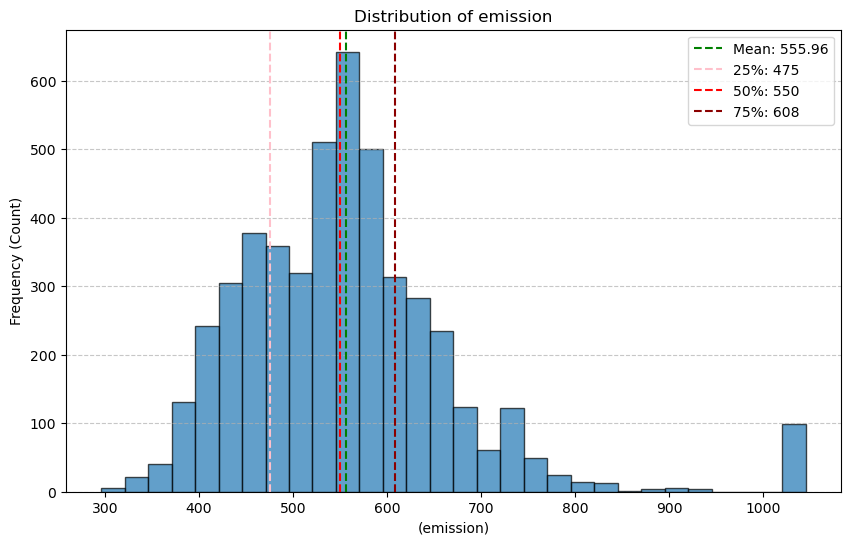

Original DataFrame Rows and Columns: (4802, 2)
Filtered DataFrame shape: (4429, 2)
Kept rows where 400 <= emission <= 800
First 5 rows:
                                              smiles  emission
0  CC(C)(CC1C=C2C3)C(N=1[Zn](N2C(C=3)=C1)(N2C3C4)...     605.0
1  CC(C)(CC1C=C(C=C2)NC2=CC2C3)C(N=1)=CC(=CC1)NC=...     634.0
2  CC(C)(CC1/C=C(\N2C3=C4)C=C3)/C(N=1)=C/C(=CC1)N...     610.0
3  CC(C)(CC1C=C2C3)C(N=1[Zn](N1C45)(N2C2C=3)N(C(C...     607.0
4  CC(C)(CC1C=C(NC2=CC34)C=C2)C(N=1)=CC(NC1C(C(C=...     637.0

Descriptive statistics for 'emission':
count    4429.000000
mean      552.346713
std        84.525614
min       400.000000
25%       487.000000
50%       553.000000
75%       604.000000
max       800.000000
Name: emission, dtype: float64

--- Visualizing 'emission' Distribution ---


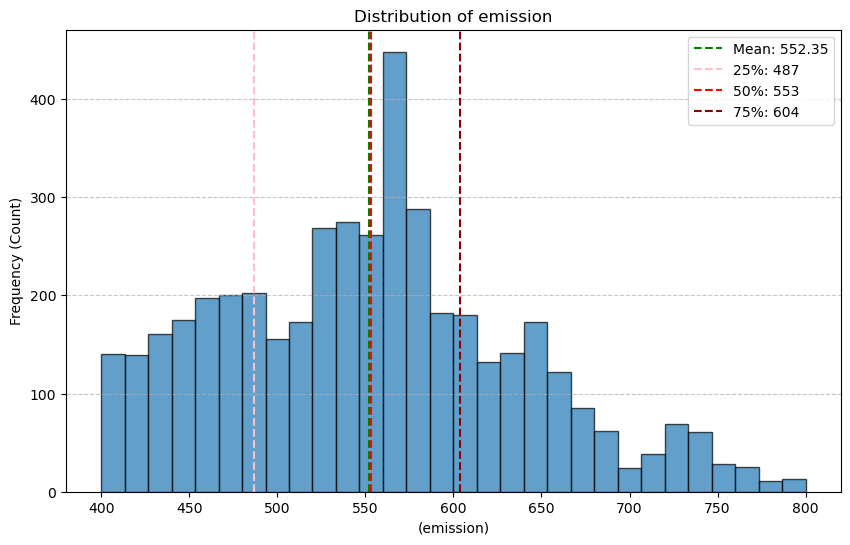

In [7]:
#:CH
#Check how the data looks.
FirstCheck_SMILES(DataSet)
#What if the data is tightened to only look at emission between 400nm and 800nm>
#RangeLimiter(DataSet)
FirstCheck_SMILES(RangeLimiter(DataSet,Min=400,Max=800))

In [113]:
#:CH
#Script to calidate smiles
def validate_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return False, "InvalidMol"
        return True, None
    except Exception as e:
        return False, str(e)

#Make and separate into working dataframs
# Apply with tracking
DataSet[['is_valid', 'error_reason']] = DataSet['smiles'].apply(
    lambda x: pd.Series(validate_smiles(x))
)

# Separate valid/invalid
valid_DataSet = DataSet[DataSet['is_valid']].copy()
invalid_DataSet = DataSet[~DataSet['is_valid']].copy()

# Save to inspect broken ones
invalid_DataSet.to_csv("invalid_smiles_diagnostics.csv", index=False)

#lots of erros. It still works though

[07:11:45] SMILES Parse Error: syntax error while parsing: CCC(=CC(=C1)CC)C=C1/C(C(=CC1)N(C=1C=C1C2(C)C)C(N1=C1C2)N(/C2C3)C(=C1)C=3)=C(/N=C1C/=2C(=CC=C2I)C=C2)C=C1
[07:11:45] SMILES Parse Error: check for mistakes around position 84:
[07:11:45] C(=C1)C=3)=C(/N=C1C/=2C(=CC=C2I)C=C2)C=C1
[07:11:45] ~~~~~~~~~~~~~~~~~~~~^
[07:11:45] SMILES Parse Error: Failed parsing SMILES 'CCC(=CC(=C1)CC)C=C1/C(C(=CC1)N(C=1C=C1C2(C)C)C(N1=C1C2)N(/C2C3)C(=C1)C=3)=C(/N=C1C/=2C(=CC=C2I)C=C2)C=C1' for input: 'CCC(=CC(=C1)CC)C=C1/C(C(=CC1)N(C=1C=C1C2(C)C)C(N1=C1C2)N(/C2C3)C(=C1)C=3)=C(/N=C1C/=2C(=CC=C2I)C=C2)C=C1'
[07:11:45] Explicit valence for atom # 5 N, 4, is greater than permitted
[07:11:45] Explicit valence for atom # 2 Cl, 6, is greater than permitted
[07:11:45] Explicit valence for atom # 1 N, 4, is greater than permitted
[07:11:45] Explicit valence for atom # 2 O, 5, is greater than permitted
[07:11:45] Explicit valence for atom # 2 O, 5, is greater than permitted
[07:11:45] Explicit valence for atom

In [114]:
print(valid_DataSet.head())
print(invalid_DataSet)

                                              smiles  emission  is_valid  \
0  CC(C)(CC1C=C2C3)C(N=1[Zn](N2C(C=3)=C1)(N2C3C4)...     605.0      True   
1  CC(C)(CC1C=C(C=C2)NC2=CC2C3)C(N=1)=CC(=CC1)NC=...     634.0      True   
2  CC(C)(CC1/C=C(\N2C3=C4)C=C3)/C(N=1)=C/C(=CC1)N...     610.0      True   
3  CC(C)(CC1C=C2C3)C(N=1[Zn](N1C45)(N2C2C=3)N(C(C...     607.0      True   
4  CC(C)(CC1C=C(NC2=CC34)C=C2)C(N=1)=CC(NC1C(C(C=...     637.0      True   

  error_reason  
0         None  
1         None  
2         None  
3         None  
4         None  
                                                smiles  emission  is_valid  \
29   CCC(=CC(=C1)CC)C=C1/C(C(=CC1)N(C=1C=C1C2(C)C)C...     611.0     False   
47   C=C/C(=C\C=N(\C)CCCCCCC=C)C(C(CC1(C)C)=N(C1=CC...     615.0     False   
102  ClN[ClH3](I)NC(C=C1/C=C(\N=C23)C(C)(C)C3)=C(N1...     617.0     False   
125  CN(=C(C1)/C=C(\N([Zn]2N(C3C4)=C5C=4)C4=C5C(=C(...     630.0     False   
137  O=C([OH3]C)C(=C(N(C1=C2C(C(C)=CC3C)=C(C)C=3)[Z

In [ ]:
#:CH
#Run me
#----------------------------------------------------------------------------------------------------
#This will be used elsewhere too.


#Generate fingerprints for all molecules
smiles_list = valid_DataSet['smiles'].tolist()
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]
fps = [morgan_gen.GetFingerprint(mol) if mol is not None else None for mol in mols]

#Initialize similarity matrix
n = len(fps)
tanimoto_matrix = []

for i in range(n):
    row = []
    for j in range(n):
        if fps[i] is not None and fps[j] is not None:
            sim = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        else:
            sim = None
        row.append(sim)
    tanimoto_matrix.append(row)

#Convert to pandas DataFrame
tanimoto_df = pd.DataFrame(tanimoto_matrix, index=smiles_list, columns=smiles_list)


In [119]:
# Display a sample
print(tanimoto_df.iloc[:3, :5])


                                                    CC(C)(CC1C=C2C3)C(N=1[Zn](N2C(C=3)=C1)(N2C3C4)N(=C1C1)C=4C=1)=CC2=CC=3  \
CC(C)(CC1C=C2C3)C(N=1[Zn](N2C(C=3)=C1)(N2C3C4)N...                                           1.000000                        
CC(C)(CC1C=C(C=C2)NC2=CC2C3)C(N=1)=CC(=CC1)NC=1...                                           0.151515                        
CC(C)(CC1/C=C(\N2C3=C4)C=C3)/C(N=1)=C/C(=CC1)N(...                                           0.353846                        

                                                    CC(C)(CC1C=C(C=C2)NC2=CC2C3)C(N=1)=CC(=CC1)NC=1C=C(C=3)N=2  \
CC(C)(CC1C=C2C3)C(N=1[Zn](N2C(C=3)=C1)(N2C3C4)N...                                           0.151515            
CC(C)(CC1C=C(C=C2)NC2=CC2C3)C(N=1)=CC(=CC1)NC=1...                                           1.000000            
CC(C)(CC1/C=C(\N2C3=C4)C=C3)/C(N=1)=C/C(=CC1)N(...                                           0.164179            

                                      

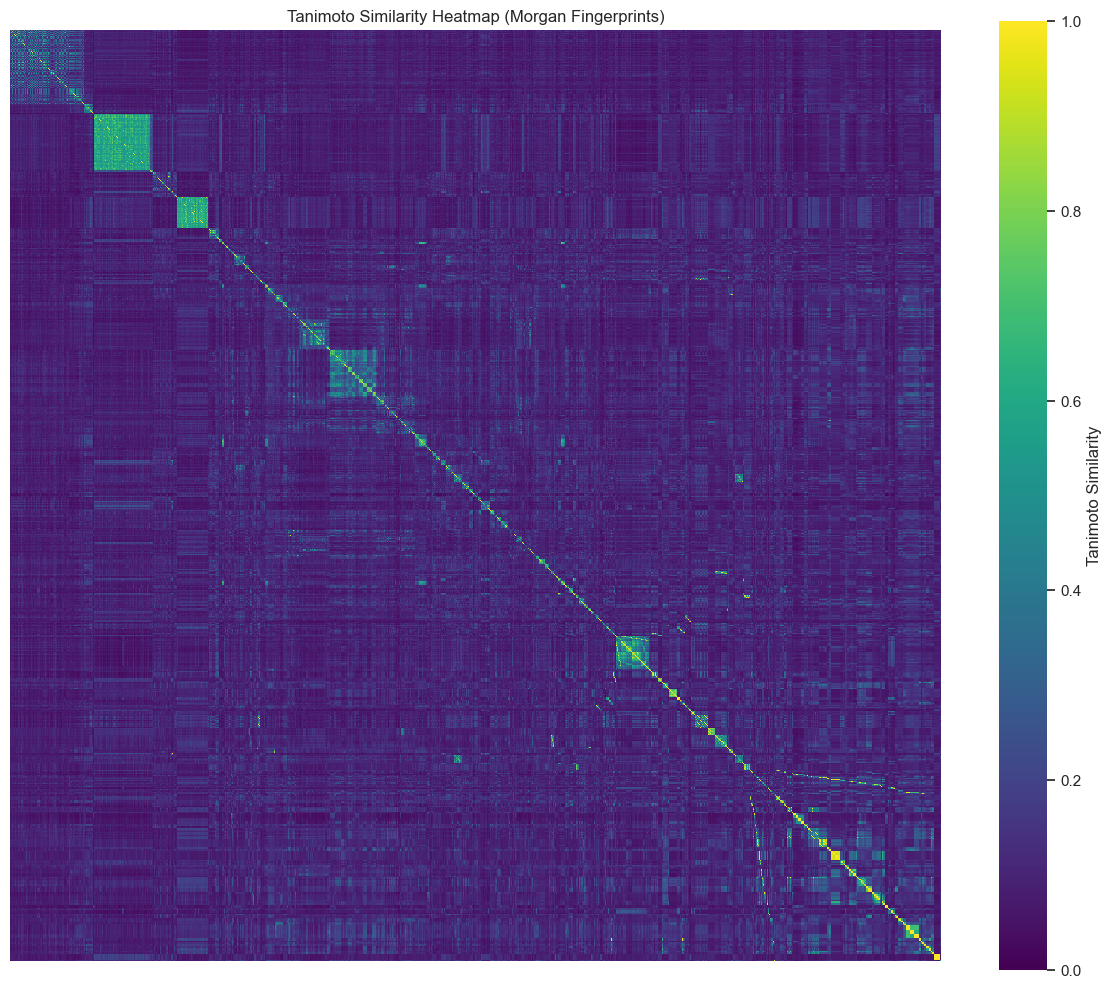

In [38]:
#:CH
# Set the figure size and style
plt.figure(figsize=(12, 10))
sns.set(style='white')

# Generate the heatmap
sns.heatmap(
    tanimoto_df,
    cmap='viridis',  # or "coolwarm", "magma", etc.
    xticklabels=False,  # Hide SMILES since too many
    yticklabels=False,
    square=True,
    cbar_kws={'label': 'Tanimoto Similarity'}
)

plt.title('Tanimoto Similarity Heatmap (Morgan Fingerprints)')
plt.tight_layout()
plt.show()


C:\Users\Codi\anaconda3\envs\my-rdkit-env\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\Codi\anaconda3\envs\my-rdkit-env\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


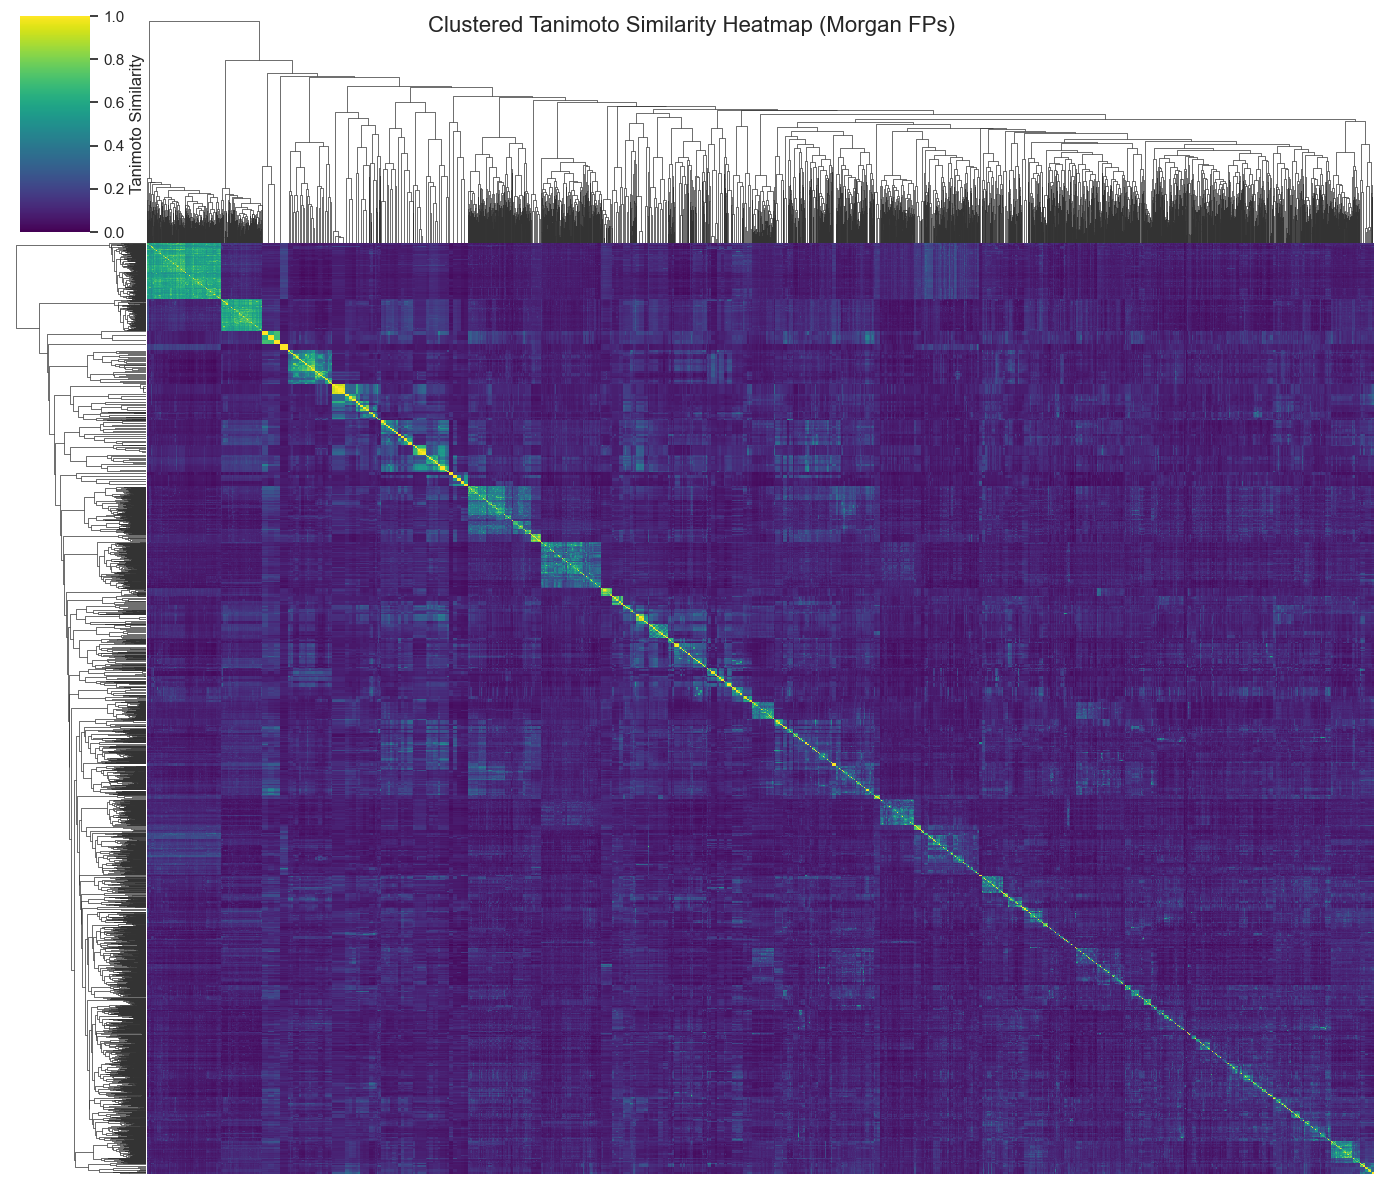

In [39]:
#:CH
#Create a clustered heatmap
clustermap = sns.clustermap(
    tanimoto_df,
    cmap='viridis',
    metric='euclidean',  # Clustering method (can also try 'cosine' or 'correlation')
    method='average',     # Linkage method (e.g., 'single', 'complete', 'ward', etc.)
    figsize=(14, 12),
    xticklabels=False,
    yticklabels=False,
    cbar_kws={'label': 'Tanimoto Similarity'},
    dendrogram_ratio=(.1, .2),  # Adjust dendrogram size if needed
)

clustermap.fig.suptitle('Clustered Tanimoto Similarity Heatmap (Morgan FPs)', fontsize=16)
plt.show()

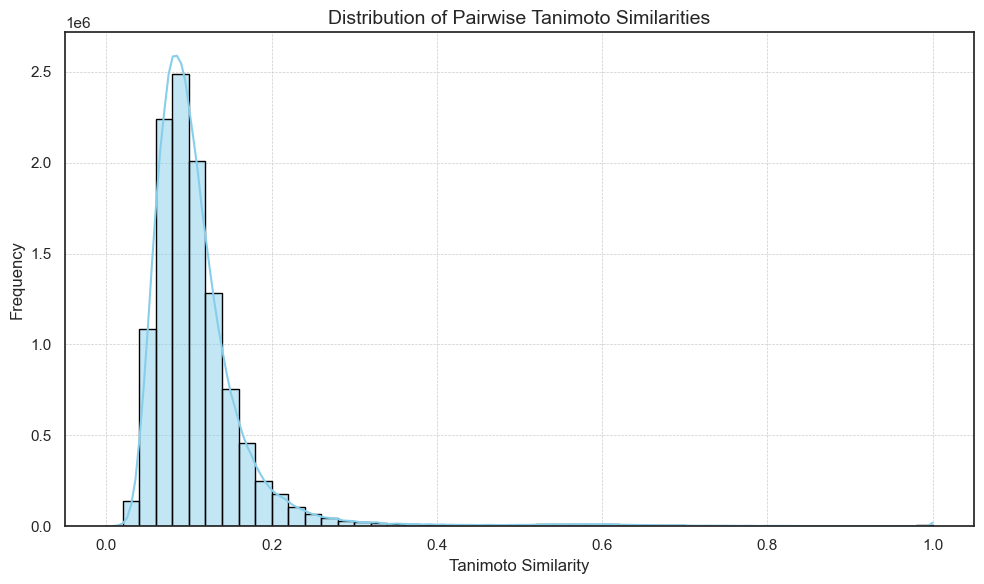

In [40]:
#:CH
# Extract upper triangle values (excluding diagonal)
similarity_values = [
    tanimoto_df.iloc[i, j]
    for i in range(len(tanimoto_df))
    for j in range(i + 1, len(tanimoto_df))
    if pd.notnull(tanimoto_df.iloc[i, j])
]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(similarity_values, bins=50, kde=True, color="skyblue", edgecolor="black")

# Labels and title
plt.title("Distribution of Pairwise Tanimoto Similarities", fontsize=14)
plt.xlabel("Tanimoto Similarity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [127]:
#:CH
# Convert fingerprints to NumPy bit vectors
bit_vectors = []
valid_indices = []

for i, fp in enumerate(fps):
    if fp is not None:
        arr = np.zeros((1,), dtype=np.int8)
        DataStructs.ConvertToNumpyArray(fp, arr)
        bit_vectors.append(arr)
        valid_indices.append(i)

bit_vectors = np.array(bit_vectors)
#print(bit_vectors)

#Compute pairwise distance matrix using Tanimoto (1 - Tanimoto similarity = distance)
distance_matrix = pairwise_distances(bit_vectors, metric='jaccard')  # Jaccard == 1 - Tanimoto
#print(distance_matrix)

#Check for NaN or infinity in the distance matrix
if np.any(np.isnan(distance_matrix)) or np.any(np.isinf(distance_matrix)):
    print("Distance matrix contains NaNs or infinities!")

#DBSCAN clustering (tune eps and min_samples parameters)
db = DBSCAN(eps=0.55, min_samples=30, metric='precomputed')  # Tune `eps` as needed or min_samples
labels = db.fit_predict(distance_matrix)
#print(db)

# Check DBSCAN output (labels)
print(f"DBSCAN labels: {np.unique(labels)}")
#labels

DBSCAN labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24]


array([ 0,  1, -1, ..., -1, -1, -1], shape=(4766,))

t-SNE embedding shape: (4766, 2)


C:\Users\Codi\AppData\Local\Temp\ipykernel_14344\3949676580.py:11: UserWarning: 
The palette list has fewer values (25) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, palette=palette, legend='full', s=40)


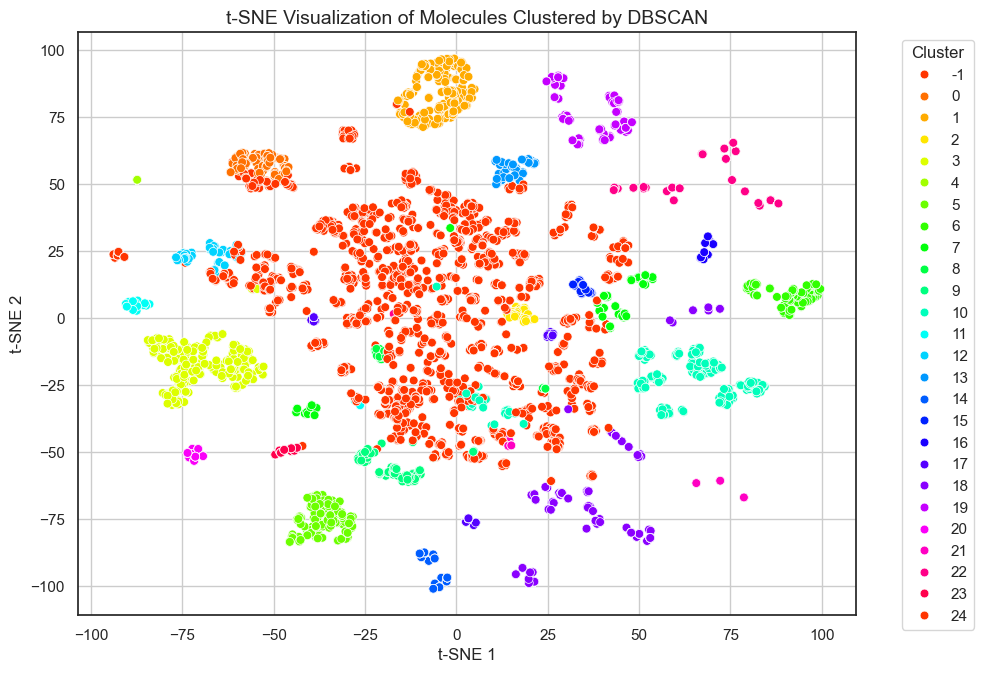

In [108]:
#:CH
#Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embedding = tsne.fit_transform(distance_matrix)

# Check shape of embedding
print(f"t-SNE embedding shape: {embedding.shape}")

#Plot t-SNE with DBSCAN cluster labels
plt.figure(figsize=(10, 7))
palette = sns.color_palette("hsv", np.unique(labels).max() + 1)
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, palette=palette, legend='full', s=40)

plt.title("t-SNE Visualization of Molecules Clustered by DBSCAN", fontsize=14)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


<font color='red'>7. Feature Engineering </font>
***
Structural, Optical, and Photophysical Descriptors. How to store the exponetial enumerations of descriptors?
<br> **How to make sure the format, style, ontology of descriptors and features do not influence correlation? (Example: an empty field should not be considered the same as a property value=0)**
<br> Web based generator: http://www.scbdd.com/chemdes/

<br>List of properties as a start:
>1. FP, molecule weight, heavy atoms
2. Metal center
3. Core Structure
4. Adjency matrixes, 1D or 2D or 3D graph values of atoms

>5. $\epsilon$ converted to log values or unconverted
6. IF $\epsilon$ or $I_{Q}/I_{Qx}$ is present, then calculate out the relative intensities
7. Stokes shifts between bands reported in nm and wavenumbers
8. Energy gap from Homo-Lumo
9. Energy gap from abs to emission spectrum

>10. Fragments
11. Ligands
12. Ligand properties :: this gets a whole subdivision of features for each ligand
13. Ligand connectivity position ={meso, beta}
14. ...

>15. Photochemical specific properties as keywords for searching below
16. Woodward–Fieser rules
17. Gouterman Model
18. Frontier MO Theory
19. Aromaticity Metrics
20. Oscillator Strength or Dipole Moment
21. Hammett Equation
22. Platt’s Empirical Relationship
23. Approximating symmetry class
 

In [ ]:
#Structural, Optical, and Photophysical Descriptors

#Any features that have to be hand specified because they aren't in packages and are unique properties for our dyes
AddedFeatures = [
    "StokesShift_nm_Abs_Ems", # = (Max absorbance wavelength) - (Min Emission wavelegth) 
    "StokesShift_nm_B_Qy", # = (Max absorbance wavelength) - (Soret absorbance wavelegth) 
    "StokesShift_cm_Abs_Ems", # = (1e7)/(Max absorbance wavenumber) - (1e7)/(Min Emission wavenumber) 
    "StokesShift_cm_B_Qy", # = (1e7)/(Max absorbance wavenumber) - (1e7)/(Soret absorbance wavenumber) 
    "Egap_Spectra", # Egap = 1240/(Max_Abs) - 1240/(Min_Ems)
    "Egap_HOMO_LUMO", # Egap = (HOMO) - (LUMO)
    "Brightness", # Brightness = (PLQY) x (extinction coefficient)
]

#Featurizer for each category or package used
def ComputeOpticalFeatures():
    """
    Computes related features
    """
def ComputeMordredFeatures():
    """
    Computes related features
    """

#Identify then Separate the core structure from ligands. Try using a graphp-based approach. This may help with inverse-design later.
#Need a descriptor for identifying core structure as a feature.
#Could be SELFIES, SMILES, InChI, Adjency Matrix, or even simply labeling 1-20 for each carbon on outside of ring....
def ClassifyCoreStructure():
    """
    Determines sub-class of molecule and can be called for validating end-user entered structure

    Returns: 
        True = Porphyrin, Chlorin, BacterioChlorin {optionals: corrole, corrin, azoporphyrin, phthalocyanine, ...}
        False = Not macrocycle
    """

def IdentifySubstituents():
    """
    Computes and Identifies Ligands.
    Adds Ligands to alt Database to then be featurized and correlated later.
    """

## Apply Sanity Checks

In [128]:
#:CH
#One stop function for encoding all desired properties from SMILES....
#way to many?... Some are addresses and need to be properly explanded (aka viewed)
def EncodeMolecule(SMILES_string):
    """
    Given a SMILES string return a list of molecular encodings

    Listed a bunch. Need to go back in a think through them...maybe
    
    Arguments
    SMILES_string
    
    Returns
    mol_encoded: A list of molecule features

        
    """
    #translate string to object
    mol = rdkit.Chem.MolFromSmiles(SMILES_string)

    # make list of functions to use
    # Need to go back in and describe each with comments
    # Simply gathered some that caught my attention. There might be redundancies or Fallacies below.
    functions = [
        rdkit.Chem.Lipinski.FractionCSP3,
        rdkit.Chem.Lipinski.HeavyAtomCount,
        rdkit.Chem.Lipinski.NHOHCount,
        rdkit.Chem.Lipinski.NOCount,
        rdkit.Chem.Lipinski.NumAliphaticCarbocycles,
        rdkit.Chem.Lipinski.NumAliphaticHeterocycles,
        rdkit.Chem.Lipinski.NumAliphaticRings,
        rdkit.Chem.Lipinski.NumAromaticCarbocycles,
        rdkit.Chem.Lipinski.NumAromaticHeterocycles,
        rdkit.Chem.Lipinski.NumAromaticRings,
        rdkit.Chem.Lipinski.NumHAcceptors,
        rdkit.Chem.Lipinski.NumHDonors,
        rdkit.Chem.Lipinski.NumHeteroatoms,
        rdkit.Chem.Lipinski.NumRotatableBonds,
        rdkit.Chem.Lipinski.NumSaturatedCarbocycles,
        rdkit.Chem.Lipinski.NumSaturatedHeterocycles,
        rdkit.Chem.Lipinski.NumSaturatedRings,
        rdkit.Chem.Lipinski.RingCount,
        rdkit.Chem.Descriptors.ExactMolWt,
        rdkit.Chem.Descriptors.HeavyAtomMolWt,
        rdkit.Chem.Descriptors.FpDensityMorgan1,
        rdkit.Chem.Descriptors.FpDensityMorgan2,
        rdkit.Chem.Descriptors.FpDensityMorgan3,
        rdkit.Chem.Descriptors.NumRadicalElectrons,
        rdkit.Chem.Descriptors.NumValenceElectrons,
        #rdkit.Chem.Fingerprints.FingerprintMols.FingerprintMol,
        #rdkit.Chem.Scaffolds.MurckoScaffold.MakeScaffoldGeneric,
        rdkit.Chem.GraphDescriptors.BertzCT,
        rdkit.Chem.GraphDescriptors.BalabanJ,
        rdkit.Chem.GraphDescriptors.AvgIpc,
        rdkit.Chem.MolStandardize.rdMolStandardize.ScoreRings,
        rdkit.Chem.SpacialScore.SPS,
        #rdkit.Chem.rdReducedGraphs.GetErGFingerprint,
        #rdkit.Chem.rdmolops.GetAdjacencyMatrix,
        #rdkit.Chem.rdmolops.GetDistanceMatrix,
        #rdkit.Chem.rdmolops.LayeredFingerprint,
        #rdkit.Chem.rdmolops.RDKFingerprint,
        #rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors,
        #rdkit.Chem.rdMolDescriptors.GetConnectivityInvariants
    ]

    # initialize list of properties
    fingerprint = [0]*len(functions)

    #do each mol object for each item in list
    for i in range(len(functions)):
        fingerprint[i] = functions[i](mol)

    mol_encoded = fingerprint
    #return functions, mol_encoded #consider adding a way to see function too. Maybe through into csv.
    return mol_encoded


#random molecules to test out below
print(EncodeMolecule(DataSet.iloc[1, 0]))
#print(EncodeMolecule(DataSet.iloc[10, 0]))
#print(EncodeMolecule(DataSet.iloc[3000, 0]))

([<function <lambda> at 0x0000025781235760>, <function HeavyAtomCount at 0x00000257812356C0>, <function <lambda> at 0x0000025781235580>, <function <lambda> at 0x00000257812354E0>, <function <lambda> at 0x0000025781235D00>, <function <lambda> at 0x00000257812359E0>, <function <lambda> at 0x0000025781235C60>, <function <lambda> at 0x0000025781235A80>, <function <lambda> at 0x0000025781235940>, <function <lambda> at 0x0000025781235800>, <function <lambda> at 0x0000025781235120>, <function <lambda> at 0x00000257812349A0>, <function <lambda> at 0x0000025781235260>, <function <lambda> at 0x00000257812353A0>, <function <lambda> at 0x0000025781235BC0>, <function <lambda> at 0x0000025781235B20>, <function <lambda> at 0x00000257812358A0>, <function <lambda> at 0x0000025781235620>, <function <lambda> at 0x00000257812877E0>, <function HeavyAtomMolWt at 0x0000025781287740>, <function FpDensityMorgan1 at 0x0000025781287E20>, <function FpDensityMorgan2 at 0x0000025781287EC0>, <function FpDensityMorga

In [106]:
#:CH
#rdkit.Chem.rdmolops.GetAdjacencyMatrix(rdkit.Chem.MolFromSmiles(DataSet.iloc[2, 0]))
A=rdkit.Chem.rdmolops.RDKFingerprint(rdkit.Chem.MolFromSmiles(DataSet.iloc[11, 0]))
B=rdkit.Chem.rdmolops.RDKFingerprint(rdkit.Chem.MolFromSmiles(DataSet.iloc[30, 0]))

rdkit.DataStructs.cDataStructs.AllBitSimilarity(A,B)

0.5107421875

In [129]:
#:CH
A=rdkit.Chem.rdmolops.LayeredFingerprint(rdkit.Chem.MolFromSmiles(DataSet.iloc[11, 0]))
B=rdkit.Chem.rdmolops.LayeredFingerprint(rdkit.Chem.MolFromSmiles(DataSet.iloc[30, 0]))

rdkit.DataStructs.cDataStructs.AllBitSimilarity(A,B)

0.70458984375

In [9]:
#:CH
#Testing descriptors
#rdkit.Chem.GraphDescriptors.BertzCT(rdkit.Chem.MolFromSmiles(DataSet.iloc[1, 0]))
#np.array(rdkit.Chem.rdmolops.PatternFingerprint(rdkit.Chem.MolFromSmiles(DataSet.iloc[1000, 0])))

<font color='red'>7. Con't. Ligands and Fragments Feature Engineering </font>
***
How to featurize multiple atoms and functional group?
<br>*Nomenclature is all the same: 'Functional groups' = 'Ligands' = 'Moieties' = 'R-groups' = 'Substituents'*
<br>List of properties as a start:
>1. FP, molecule weight, heavy atoms
2. Metals?
3. Core Structure it was attached to
4. Adjency matrix
5. Does the liagnd have it's own spectral properties? The functional groups are smaller, generic, and probably searched in other packages/databases.
6. Other seasily accesible or searchable properties?
7. Are the substituents also a dye in another class of chemicals?
8. Can they be fragmented again? How many times can we fragment our structures?
9. Ligand connectivity position ={meso, beta}
10. Ligand symmetry. Are the ligands attached to molecule in the same repeating positions?
11. Are connected ligands descriptors symmetrical even though they are atomistcally different?
12. EWG or EDG
13. Water solublizing, Bioconjugating
14. Do other ligands influence the behavior of the substituent? Maybe not directly connect?
 

In [ ]:
# Fragment Features. SELFIES-base tagging of meso/beta/electron-withdrawing/donating groups
#Add fragment features: Murcko scaffolds, BRICS, MACCS keys

def ComputeSubstituentFeatures():
    """
    Computes related discriptors
    """
def IdentifySubstituent():
    """
    Computes related discriptors
    """
def ConnectSubstituentFeatures():
    """
    Computes related discriptors
    """

## Apply Sanity Checks

<font color='red'>8. Modeling </font>
***

## Broken up in subsections:
1. Modeling Methods
2. Training Sets
3. Statistical Analysis
4. Fine Tunning

### 1. Modeling Methods
1. Linear Regression
2. Random Forrest
3. ...

### 2. Training Sets
1. Master Database
2. Database filtered for just porphyrin vs chlorin vs bacteriochlorin
3. Rearrangemnet and size manipulation of training sets
4. ...

### 3. Statistical Analysis and running Test Sets
1. RMSE
2. Parity Plots
3. Evaluation of ML confidence 
4. Evaluation of error or error
5. ...
<br> Iterate over different hyperparameters.

### 4. Fine Tunning
<br> Create a function to get the escence of gradient descent. AKA, the funxtion can change a hyperparameter -> observe statistical results -> make a change in hyperparameter -> compare tp previous stat result and *decide to increase or decrease* hyperparameter till a max or min is found. Pretty sure something already exists, just got to install it.

In [ ]:
## First pass Modeling (Linear Regression)

## Modeling (Random Forest)
def TrainRandomForrestModel():
    """
    Trains a Random Forest model on numeric features to predict target property.
    Returns trained model and feature columns.
    """

## Training data sets.


## Stat analysis
def StructuralSimiliarity():
    """
    Use FP and Fragmentation to compare structure.
    Like Tanimoto fingerprint similarity. If this =1, then we know the chemical is actually in our database.
    """

## Visualizations of results and data analysis


## Fine Tunning
    

<font color='red'>9. User Model testing </font>
***
Try the model out with SMILES

In [1]:
## Run the ML code and eval results


## Draw the Structure of chemical


<font color='red'>10.Ligand Optimizing and training </font>
***
ML on ligand training sets.
<br>Evaluate

In [ ]:
## similar to 8 but with generated features crossed with master data set or such.

## sanity check

## visualize data
# Visualize property shifts due to fragment-level changes


<font color='red'>11.Ligand Perturbation </font>
***
Get entry from user for their desired properties.
<br>Attempt to increment attached ligands by a very small change towards desired outcome by using some descriptor value in generated database.
<br>Generate Smiles
<br>Run ML

In [ ]:
## perturb
def FindClosestStructures():
    """
    Finds similar molecules
    """

def GenerateClosestStructures():
    """
    Uses Regressoin to predict similar molecules 
    """

## output (5 or so) different structures. Draw structures too.

## visualize scatterplot of predicted structures overlayed on training set and maybe even which molecule in database would be nearest neighbor.

In [ ]:
## First pass Modeling (Linear Regression)

## Modeling (Random Forest)
def TrainRandomForrestModel():
    """
    Trains a Random Forest model on numeric features to predict target property.
    Returns trained model and feature columns.
    """

## Training data sets.


## Stat analysis


## Fine Tunning
    